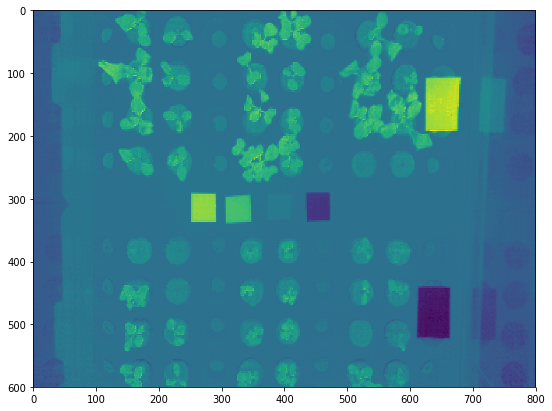

In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage as ndi
from skimage import feature

plt.rcParams['figure.figsize'] = [9, 7]

image = cv2.imread("nd_single_channel.png")
# scale down by factor of 3 (its a huge image)
image = cv2.resize(image, (image.shape[1],image.shape[0]))
# convert bgr to rgb for matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)

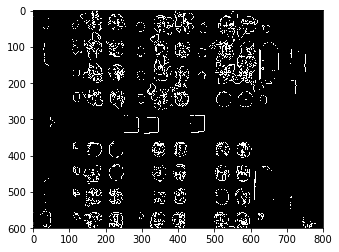

In [2]:
# apply openCV canny edge detection
edged = cv2.Canny(image, 10,35,True, 3)
plt.imshow(edged,cmap="gray")

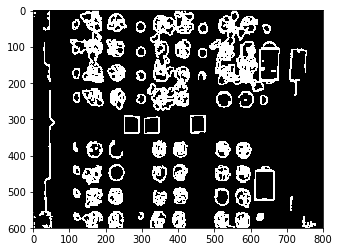

In [3]:
# create square kernel matrix
kern = cv2.getStructuringElement(cv2.MORPH_RECT, (4,4))
dilated = cv2.morphologyEx(edged, cv2.MORPH_DILATE, kern)
kern = cv2.getStructuringElement(cv2.MORPH_RECT, (1,1))
eroded = cv2.morphologyEx(dilated, cv2.MORPH_ERODE, kern)


# apply close operation
# closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kern)

plt.imshow(eroded, cmap="gray")

The contrasted image looks pretty good, lets find our contours

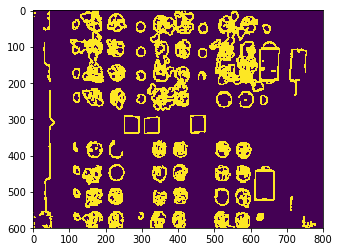

In [4]:
img, contours, dtype = cv2.findContours(eroded.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(img)

Now we find bounding rectangles of connected shapes

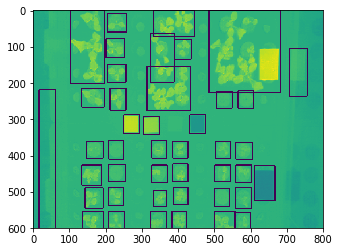

In [5]:
box_img = image.copy()
for c in contours:
    perim = cv2.arcLength(c, True)
    x,y,w,h = cv2.boundingRect(c)
    
    if(w>35 and h>35):
        
        cv2.rectangle(box_img, (x,y), (x+w, y+h), (0,255,0), 2)
    
plt.imshow(box_img)

Now we can filter and save each region of interest as a seperate file, allowing us to process faster and consider plants individually.